In [1]:
from collections import OrderedDict
import time
import matplotlib.pyplot as plt
import numpy as np
import time
import traceback
from core.module import Connector, StatusVar
from core.util.mutex import Mutex
from logic.generic_logic import GenericLogic
from qtpy import QtCore
from TimeTagger import GatedChannel,CountBetweenMarkers

from PyDAQmx import Task
import TimeTagger as tt
import PyDAQmx
import datetime
import PyDAQmx as daq


In [2]:
import telegram
bot = telegram.Bot(token='968560013:AAGSzyvq3SEnHpo-o4WPeXM8_sywoKDYZH0')
# print(bot.get_me())
# chat_id = bot.get_updates()[-1].message.chat_id
chat_id = 111963322
# bot.sendMessage(chat_id=chat_id, text="Hi, Javid. I am initialised and ready to serve you")

In [3]:
""" Simple example of digital output

    This example outputs the values of data on line 0 to 7
"""

off = np.array([0,0,0,0,0,0,0,0], dtype=np.uint8)
green = np.array([0,0,1,0,0,0,0,0], dtype=np.uint8)
markers = np.array([1,0,0,0,0,0,0,0], dtype=np.uint8)
markers2 = np.array([0,0,0,0,0,1,0,0], dtype=np.uint8)
redAOM = np.array([0,0,0,1,0,0,0,0], dtype=np.uint8)
redAOM2 = np.array([0,0,0,0,1,0,0,0], dtype=np.uint8)
mw_trig = np.array([0,1,0,0,0,0,0,0], dtype=np.uint8)

task = Task()
task.CreateDOChan("/Dev4/port0/line0:7","",PyDAQmx.DAQmx_Val_ChanForAllLines)


def greenFunc():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
    task.StopTask()
    
def redExFunc():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
    task.StopTask()
    
def redA1Func():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM2,None,None)
    task.StopTask()

def offFunc():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,off,None,None)
    task.StopTask()

    
def mw_odmr():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+green,None,None)
    task.StopTask()
    
def mw_on():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig,None,None)
    task.StopTask()
    

def mw_pleEx():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+redAOM,None,None)
    task.StopTask()
    

def mw_pleA1():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+redAOM2,None,None)
    task.StopTask()
        
    
def readoutFunc(readouttime):
    countBM.clear() # Clear the buffer
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers,None,None)
    time.sleep(readouttime)
    task.StopTask()
    offFunc()
    
    return countBM.getData()[0]
    
def readoutEx(readouttime):
    countBM.clear() # Clear the buffer
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers+redAOM,None,None)
    time.sleep(readouttime)
    task.StopTask()
    offFunc()
    
    return countBM.getData()[0]


In [4]:
def start_scanning(v_min=None, v_max=None, speed = None):

    if speed is not None:
        laserscannerlogic.set_scan_speed(speed)    
    else:
        laserscannerlogic.set_scan_speed(0.1)

    try:
#         if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
#             laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
#             time.sleep(0.5)
# #             laserscannerlogic._pulse_generator_device.pulser_on()
# #             laserscannerlogic.odmrlogic().mw_cw_on()
#         else:
#             laserscannerlogic.log.error('load PLE sequence on AWG')
#             laserscannerlogic._pulse_generator_device.pulser_off()
#             laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
#             laserscannerlogic.odmrlogic().mw_off()
#             laserscannerlogic.stop_scanning()
#     #         return -1


#         if v_min is not None:
#             laserscannerlogic.scan_range[0] = v_min
#         else:
#             v_min = laserscannerlogic.scan_range[0]
#         if v_max is not None:
#             laserscannerlogic.scan_range[1] = v_max
#         else:
#             v_max = laserscannerlogic.scan_range[1]

#         laserscannerlogic._scan_counter_up = 0
#         laserscannerlogic._scan_counter_down = 0
#         laserscannerlogic.upwards_scan = [True,True]

#         # TODO: Generate Ramps
#         laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, laserscannerlogic._scan_speed)
#         laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, laserscannerlogic._scan_speed)

        
#         laserscannerlogic._initialise_data_matrix(len(laserscannerlogic._upwards_ramp))

        # Lock and set up scanner
        returnvalue = laserscannerlogic._initialise_scanner()
#         print('1scan init')

        if returnvalue < 0:
            print('error in scanner init')
            # TODO: error message
            return -1
#         print('2scan init')
        laserscannerlogic.sigScanStarted.emit()
#         print('3scan init')

    except Exception as e:
        laserscannerlogic.log.error('The scan went wrong, killing the scanner.')
        laserscannerlogic.stop_scanning()
        raise e

def kill_scanner():
    laserscannerlogic.stop_scanning()
#     laserscannerlogic._close_scanner()
    
    with laserscannerlogic.threadlock:
#         self._pulse_generator_device.pulser_off()
#         self._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
#         self.odmrlogic().mw_off()
        laserscannerlogic.kill_scanner()
        laserscannerlogic.stopRequested = False
        if laserscannerlogic.module_state.can('unlock'):
            laserscannerlogic.module_state.unlock()

    
    
    
    
    laserscannerlogic.sigScanFinished.emit()

In [5]:
def PLE(laser_number, v_min, v_max, speed):
    #   same function for both lasers
    #  Should keep in memory 4 scanning ramps and call the one, which corresponds to particular laser
    
    laserscannerlogic.set_laser_number(laser_number)
    
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    
    counts = laserscannerlogic._do_next_one_line()
    return counts


def PLE_A1(laser_number, v_min, v_max, speed):

    laserscannerlogic.set_laser_number(0)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleA1()
    repumpTime = 0.1
    for j in range(5):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleA1()
        counts = laserscannerlogic._do_next_one_line()
        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
#             print(ratio)
            if ratio<50:
                greenFunc()
                time.sleep(repumpTime)
                pass
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0
    


def PLE_Ex(laser_number, v_min, v_max, speed):

    
    laserscannerlogic.set_laser_number(1)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleEx()
    repumpTime = 0.1
    for j in range(5):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleEx()
        counts = laserscannerlogic._do_next_one_line()
        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
            if ratio<30:
                greenFunc()
                time.sleep(repumpTime)
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0
    



In [6]:
def PLE_A1(laser_number, v_min, v_max, speed):

    laserscannerlogic.set_laser_number(0)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleA1()
    repumpTime = 0.1
    for j in range(1):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleA1()
#         task.StartTask()
#         task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+redAOM2+green,None,None)
#         task.StopTask()
        counts = laserscannerlogic._do_next_one_line()
        return counts

        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
#             print(ratio)
            if ratio<50:
#                 greenFunc()
#                 time.sleep(repumpTime)
                pass
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0

In [7]:


def PLE_Ex(laser_number, v_min, v_max, speed):

    
    laserscannerlogic.set_laser_number(1)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleEx()
    repumpTime = 0.1
    for j in range(1):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleEx()
        counts = laserscannerlogic._do_next_one_line()
        return counts

    
        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
            if ratio<30:
                greenFunc()
                time.sleep(repumpTime)
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0
    

In [10]:
laserscannerlogic.odmrlogic().mw_off()
laserscannerlogic._pulse_generator_device.pulser_off()

(0, {-1: 'Failed Request or Communication', 0: 'Device has stopped, but can receive commands', 1: 'Device is active and running', 2: 'Device is waiting for trigger.'})

In [93]:
try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('alles gut')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
        print('load PLE sequence on AWG')

except:
    print('error')

alles gut


In [83]:
frequency =2877470000.0
power = - 16
laserscannerlogic.set_MW_params(frequency = frequency ,power = power)
laserscannerlogic.cw_mw_frequency = frequency
laserscannerlogic.cw_mw_power = power

In [8]:
print(laserscannerlogic.cw_mw_power)
print(laserscannerlogic.odmrlogic().cw_mw_power)
print(laserscannerlogic.odmrlogic().cw_mw_frequency)
print(laserscannerlogic.cw_mw_frequency)


-30
-15.0
2680000000.0
2870000000.0


In [9]:
laserscannerlogic.set_clock_frequency(250)

0

In [10]:
start_scanning()

In [11]:
470.51330 - 470.50740 

0.005899999999996908

In [19]:
_v_min_A1 = -2
_v_max_A1 = 2
speed_A1 = 0.2

greenFunc()
time.sleep(0.01)
mw_pleA1()


time.sleep(1e-2)
c = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
if isinstance(c,int):
    print (c)

24.0
[False, True]


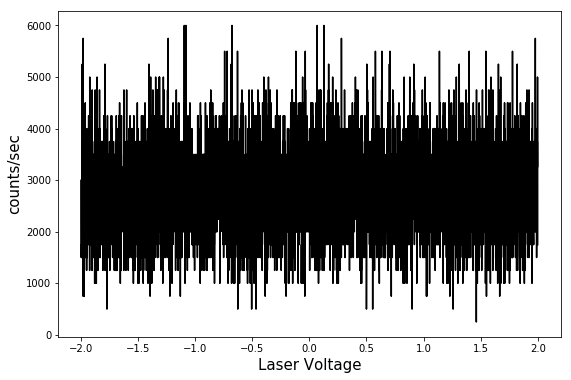

In [20]:
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')
print(laserscannerlogic.upwards_scan)

911.0
[False, False]


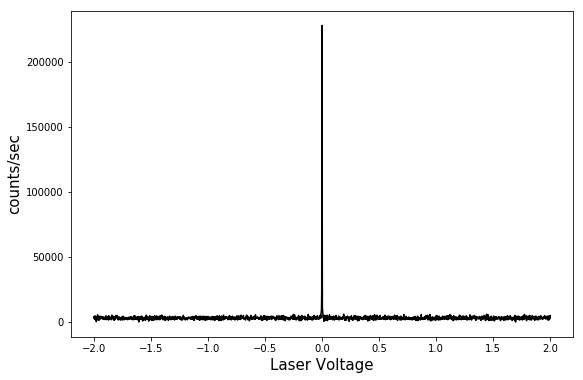

In [28]:
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')
print(laserscannerlogic.upwards_scan)

47.6
[False, False]


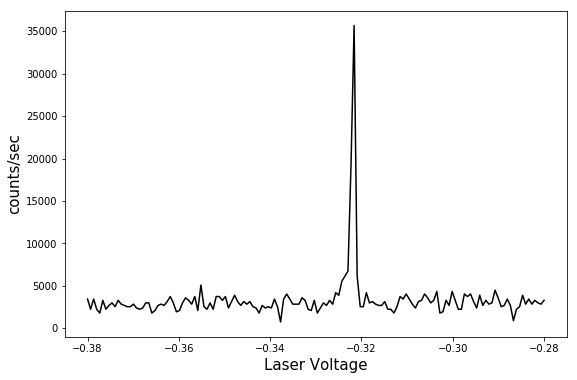

In [238]:
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')
print(laserscannerlogic.upwards_scan)

In [58]:
kill_scanner()

In [59]:
greenFunc()

In [36]:
offFunc()

In [341]:
len(laserscannerlogic._upwards_ramp[1])

1200

In [328]:

laserscannerlogic._downwards_ramp

array([[-2.00000000e-01, -2.00000000e-01, -2.00000000e-01, ...,
        -2.00000000e-01, -2.00000000e-01, -2.00000000e-01],
       [ 0.00000000e+00, -1.33422282e-03, -2.66844563e-03, ...,
        -1.99733155e+00, -1.99866578e+00, -2.00000000e+00]])

# Ex

In [28]:


laserscannerlogic.set_laser_number(1)
start_scanning()
# start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [29]:
print(laserscannerlogic._scan_speed)
print(len(laserscannerlogic._upwards_ramp[1]))

0.1
5000


In [30]:
_v_min_Ex = -2
_v_max_Ex = 2
speed_Ex = 0.2
laserscannerlogic.set_scan_speed(speed_Ex)

greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)



25.0
[False, False]


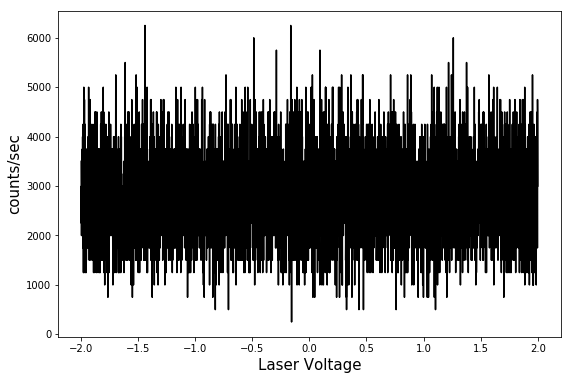

In [31]:
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_Ex,_v_max_Ex,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')
print(laserscannerlogic.upwards_scan)

In [68]:
# begin = time.time()
# laserscannerlogic._goto_speed = 0.2
# laserscannerlogic._goto_during_scan(-2)
# print(time.time()-begin)

In [32]:
kill_scanner()

In [370]:
print(laserscannerlogic._scan_speed)
print(len(laserscannerlogic._upwards_ramp[1]))

0.2
3187


In [371]:
laserscannerlogic._upwards_ramp[1]

array([-2.        , -1.99866604, -1.99733208, ...,  2.24733208,
        2.24866604,  2.25      ])

In [26]:
_v_min_Ex = -2
_v_max_Ex =-1
speed_Ex = 0.2

laserscannerlogic.set_laser_number(1)
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
# start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [488]:
_v_min_Ex = -2
_v_max_Ex =-1
speed_Ex = 0.2


greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)



36.15384615384615


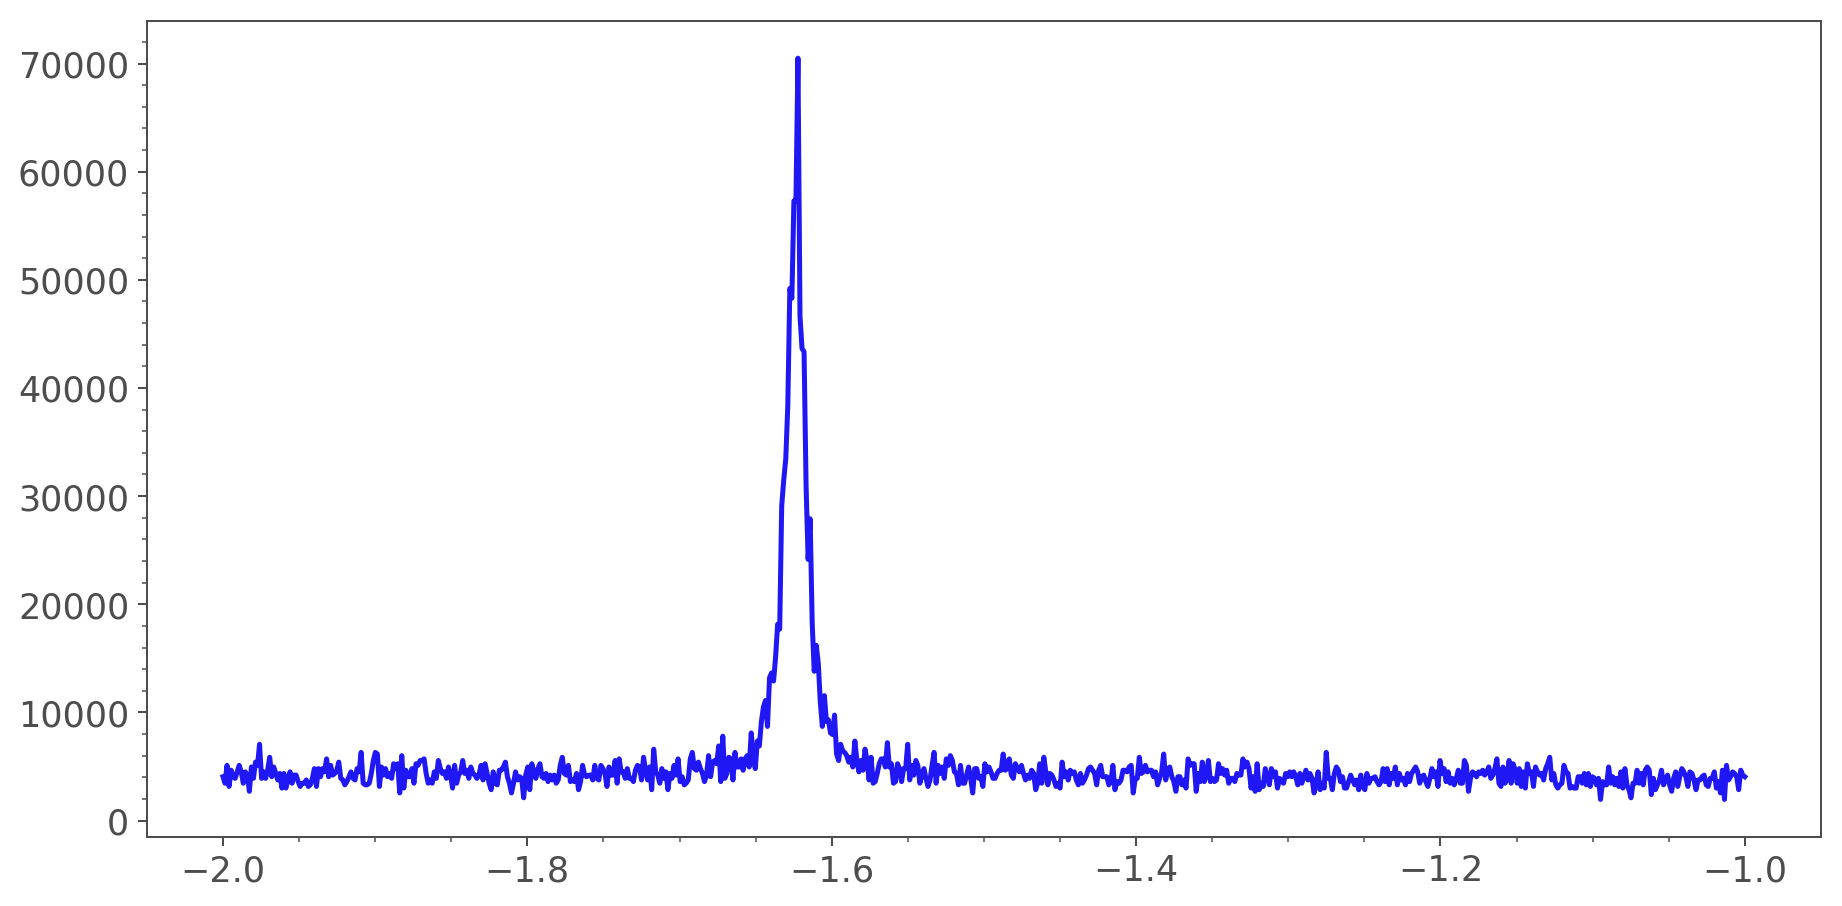

In [489]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_Ex,_v_max_Ex,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


In [364]:
.5096-.50775

0.0018500000000000183

In [25]:
kill_scanner()

In [574]:
scannerlogic.xy_image[scannerlogic._scan_counter-1,-1,1]


7.43097048470552e-06

In [2]:
scannerlogic._current_y

2.6456420678982377e-06

In [567]:
scannerlogic._scan_counter

23

In [70]:
optimizer.xy_refocus_image[0,-1,0]

2.035591562500394e-05

In [8]:
a = 'optimizer'
if not (a is 'optimizer'):
    print("ss")

In [74]:
optimizer.optim_pos_x-2.6e-6

2.9549356644865307e-05

In [2]:
optimizer._initial_pos_x

1.912160897270181e-05

In [ ]:
# scannerlogic.xy_image[::-1][-1]

In [ ]:
# scannerlogic.xy_image[0]

In [ ]:
# scannerlogic.xy_image[0][::-1]

In [104]:
scannerlogic.xy_image[0][-1]

array([2.09449936e-05, 1.07208609e-05, 5.06500000e-06, 3.36000000e+04])

In [ ]:
scannerlogic.xy_image[-1::]

In [10]:
print(optimizer._x_shift)

3e-07


In [11]:

optimizer._x_shift = 0
optimizer._y_shift = 0